In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"]=(16,8)

import warnings
warnings.filterwarnings('ignore')

In [2]:
#training dataframe
data_train = pd.read_csv('aug_train.csv')
data_train

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,NaN,<1,500-999,Pvt Ltd,2,97,0.0


In [3]:
data_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target'],
      dtype='object')

In [4]:
data_train.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

<AxesSubplot:>

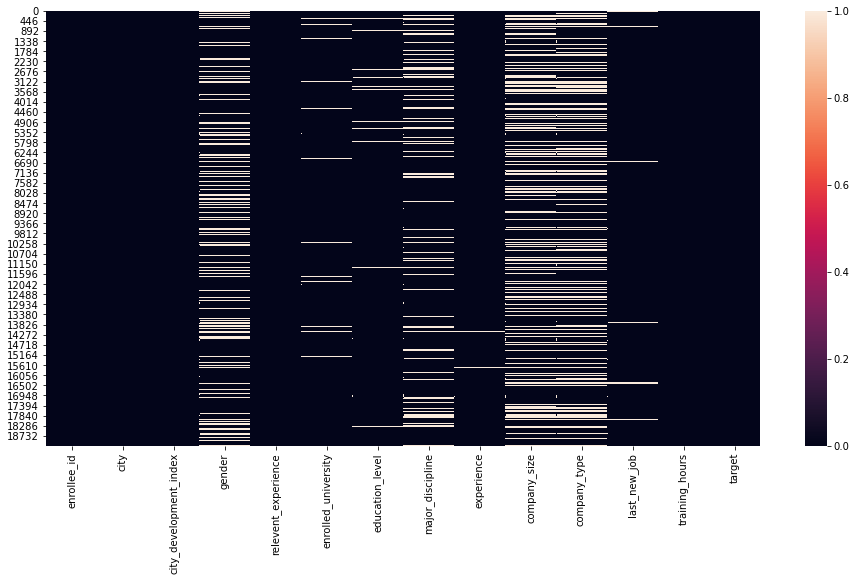

In [5]:
sns.heatmap(data_train.isnull())

In [6]:
data_train = data_train.drop(['gender','major_discipline','company_size','company_type'],axis=1)
data_train.columns

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience', 'last_new_job',
       'training_hours', 'target'],
      dtype='object')

In [7]:
data_train=data_train.dropna(axis=0)
data_train

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,1,36,1.0
1,29725,city_40,0.776,No relevent experience,no_enrollment,Graduate,15,>4,47,0.0
2,11561,city_21,0.624,No relevent experience,Full time course,Graduate,5,never,83,0.0
4,666,city_162,0.767,Has relevent experience,no_enrollment,Masters,>20,4,8,0.0
5,21651,city_176,0.764,Has relevent experience,Part time course,Graduate,11,1,24,1.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,No relevent experience,no_enrollment,Graduate,14,1,42,1.0
19154,31398,city_103,0.920,Has relevent experience,no_enrollment,Graduate,14,4,52,1.0
19155,24576,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,4,44,0.0
19156,5756,city_65,0.802,Has relevent experience,no_enrollment,High School,<1,2,97,0.0


<AxesSubplot:>

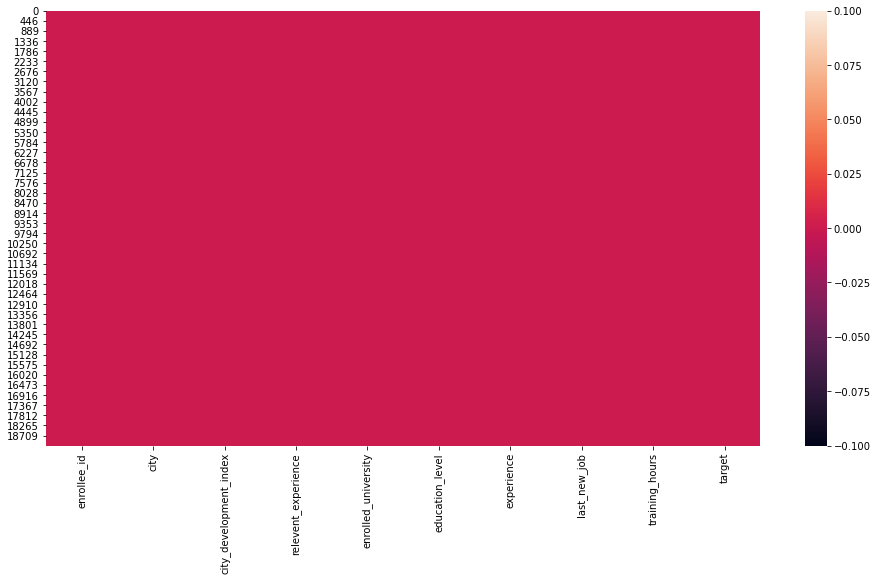

In [8]:
sns.heatmap(data_train.isnull())

In [9]:
from sklearn import preprocessing, utils

encoder = preprocessing.LabelEncoder()

for i in data_train.columns:
    if isinstance(data_train[i][0], str):
            data_train[i] = encoder.fit_transform(data_train[i])
            
data_train

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,5,0.920,0,2,0,21,0,36,1.0
1,29725,77,0.776,1,2,0,6,4,47,0.0
2,11561,64,0.624,1,0,0,15,5,83,0.0
4,666,50,0.767,0,2,2,21,3,8,0.0
5,21651,57,0.764,0,1,0,2,0,24,1.0
...,...,...,...,...,...,...,...,...,...,...
19153,7386,55,0.878,1,2,0,5,0,42,1.0
19154,31398,5,0.920,0,2,0,5,3,52,1.0
19155,24576,5,0.920,0,2,0,21,3,44,0.0
19156,5756,94,0.802,0,2,1,20,1,97,0.0


<AxesSubplot:xlabel='education_level', ylabel='enrolled_university'>

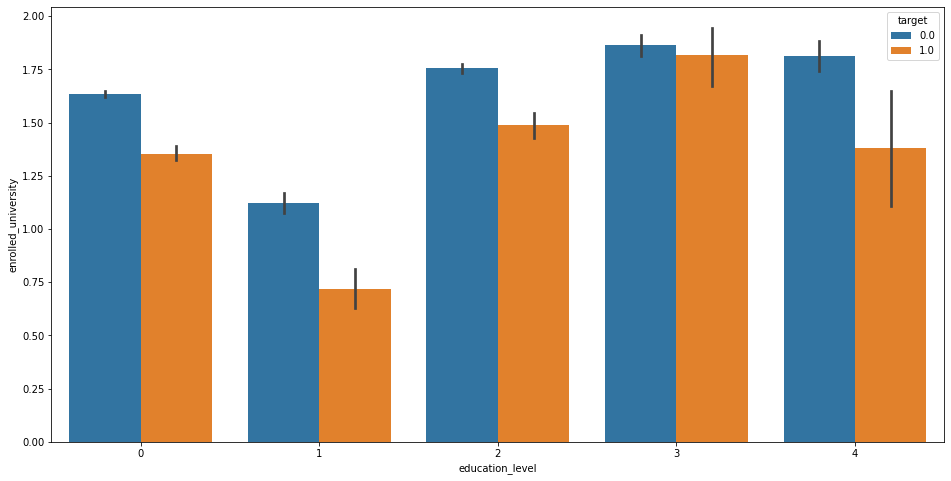

In [10]:
sns.barplot(x='education_level',y='enrolled_university',hue='target',data=data_train)

<AxesSubplot:xlabel='education_level', ylabel='relevent_experience'>

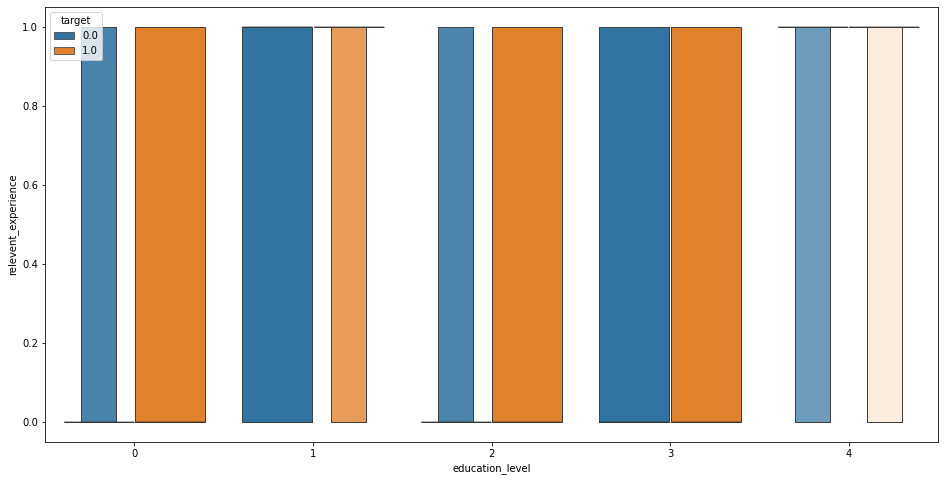

In [11]:
sns.boxenplot(x='education_level',y='relevent_experience',hue='target',data=data_train)

<AxesSubplot:xlabel='city_development_index', ylabel='city'>

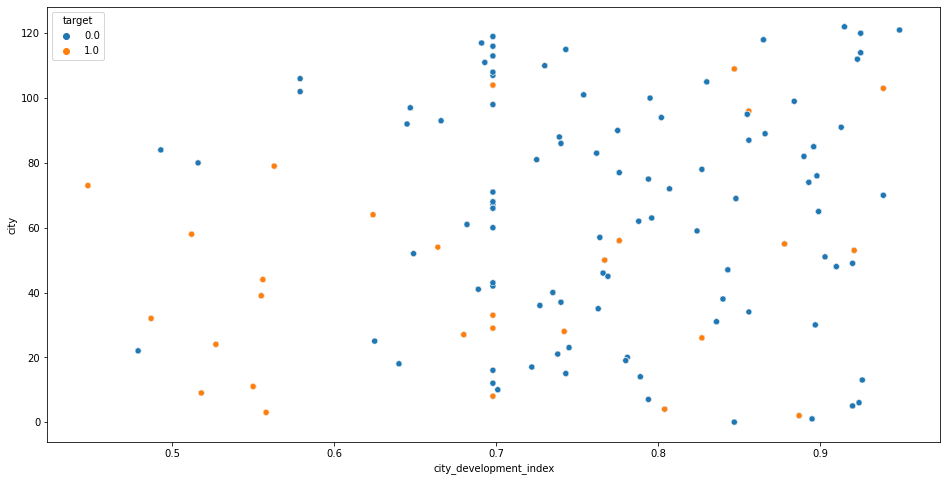

In [12]:
sns.scatterplot(x='city_development_index',y='city',data=data_train,hue='target')

In [13]:
data_train.target.value_counts()

0.0    13593
1.0     4421
Name: target, dtype: int64

In [14]:
li = list(data_train[data_train.target == 0].sample(n=9172).index)
data_train.drop(li, inplace=True)

In [15]:
data_train.target.value_counts()

0.0    4421
1.0    4421
Name: target, dtype: int64

In [16]:
data_train.relevent_experience.value_counts()

0    6137
1    2705
Name: relevent_experience, dtype: int64

In [17]:
li1 = list(data_train[data_train.relevent_experience == 0].sample(n=3500).index)
data_train.drop(li1, inplace=True)

In [18]:
data_train.relevent_experience.value_counts()

1    2705
0    2637
Name: relevent_experience, dtype: int64

In [19]:
data_train.enrolled_university.value_counts()

2    3364
0    1632
1     346
Name: enrolled_university, dtype: int64

In [20]:
data_train.education_level.value_counts()

0    3347
2    1060
1     705
3     123
4     107
Name: education_level, dtype: int64

In [21]:
data_train

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,8949,5,0.920,0,2,0,21,0,36,1.0
8,27107,5,0.920,0,2,0,17,0,46,1.0
10,29452,64,0.624,1,0,1,11,5,32,1.0
18,2156,64,0.624,0,2,0,17,5,23,1.0
19,11399,26,0.827,0,2,0,14,0,132,1.0
...,...,...,...,...,...,...,...,...,...,...
19144,17191,64,0.624,1,0,0,14,5,48,1.0
19147,21319,64,0.624,1,0,0,0,0,52,1.0
19153,7386,55,0.878,1,2,0,5,0,42,1.0
19154,31398,5,0.920,0,2,0,5,3,52,1.0


In [22]:
x=data_train.drop(['target','enrollee_id'],axis=1)
y=data_train.target

## Logistic Regression

In [23]:
from sklearn.linear_model import LogisticRegression
log = LogisticRegression()

In [24]:
log.fit(x,y)

LogisticRegression()

In [25]:
log.score(x,y)

0.6501310370647697

In [26]:
log.intercept_

array([1.83639425])

In [27]:
log.coef_

array([[ 1.94400078e-03, -3.35639986e+00,  1.06544819e+00,
         4.28203214e-02, -2.07623593e-01,  3.18109738e-02,
        -3.37290162e-02,  2.67912881e-04]])

In [28]:
predicted_log = log.predict(x)
predicted_log = pd.DataFrame(predicted_log)
predicted_log

,0
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
5337,1.0
5338,1.0
5339,1.0
5340,0.0


In [29]:
predicted_log[predicted_log == 0].count()

0    2469
dtype: int64

In [30]:
predicted_log[predicted_log == 1].count()

0    2873
dtype: int64

In [31]:
import pickle

In [32]:
with open ('log_pickle','wb') as f:
    pickle.dump(log,f)

## Decision Tree

In [33]:
from sklearn import tree
dt = tree.DecisionTreeClassifier()

In [34]:
dt.fit(x,y)

DecisionTreeClassifier()

In [35]:
dt.score(x,y)

0.9962560838637214

In [36]:
predicted_dt= dt.predict(x)
predicted_dt=pd.DataFrame(data=predicted_dt)
predicted_dt

,0
0,0.0
1,1.0
2,1.0
3,1.0
4,1.0
...,...
5337,1.0
5338,1.0
5339,1.0
5340,1.0


In [37]:
predicted_dt[predicted_dt == 0].count()

0    2542
dtype: int64

In [38]:
predicted_dt[predicted_dt == 1].count()

0    2800
dtype: int64

In [39]:
with open ('dt_pickle','wb') as f:
    pickle.dump(dt,f)

## Naive Bayes

In [40]:
from sklearn.naive_bayes import GaussianNB 
gnb = GaussianNB() 

In [41]:
gnb.fit(x, y) 

GaussianNB()

In [42]:
gnb.score(x,y)

0.6823287158367652

In [43]:
predicted_gnb = gnb.predict(x)
predicted_gnb=pd.DataFrame(data=predicted_gnb)
predicted_gnb

,0
0,0.0
1,0.0
2,1.0
3,1.0
4,0.0
...,...
5337,1.0
5338,1.0
5339,1.0
5340,0.0


In [44]:
predicted_gnb[predicted_gnb == 0].count()

0    2641
dtype: int64

In [45]:
predicted_gnb[predicted_gnb == 1].count()

0    2701
dtype: int64

In [46]:
with open ('gnb_pickle','wb') as f:
    pickle.dump(gnb,f)

In [47]:
models_accuracy = [log.score(x,y),dt.score(x,y),gnb.score(x,y)]
models_accuracy=pd.DataFrame(data=models_accuracy)
models_accuracy

,0
0,0.650131
1,0.996256
2,0.682329


In [48]:
models_accuracy=models_accuracy.pivot_table(columns=[0,1,2])
models_accuracy.columns=['Logistic Regression','Decision Tree', 'Naive Bayes']
models_accuracy.index=['Score']
models_accuracy

,Logistic Regression,Decision Tree,Naive Bayes
Score,0.650131,0.996256,0.682329


<AxesSubplot:xlabel='Models', ylabel='Accuracy Scores'>

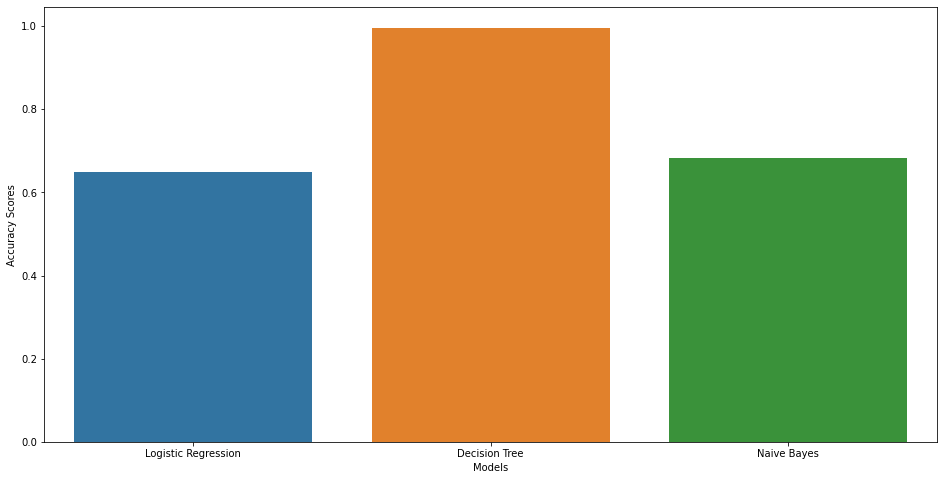

In [49]:
ax=sns.barplot(data=models_accuracy)
ax.set(xlabel='Models',ylabel='Accuracy Scores')
ax

# We trained the training DataFrame using Logistic Regression, Decision Tree & Naive Bayes and saved the models to be used in prection of testing DataFrame

In [50]:
#testing dataframe
data_test = pd.read_csv('aug_test.csv')
data_test

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,32403,city_41,0.827,Male,Has relevent experience,Full time course,Graduate,STEM,9,<10,NaN,1,21
1,9858,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,5,NaN,Pvt Ltd,1,98
2,31806,city_21,0.624,Male,No relevent experience,no_enrollment,High School,NaN,<1,NaN,Pvt Ltd,never,15
3,27385,city_13,0.827,Male,Has relevent experience,no_enrollment,Masters,STEM,11,10/49,Pvt Ltd,1,39
4,27724,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10000+,Pvt Ltd,>4,72
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,Male,No relevent experience,no_enrollment,Graduate,Humanities,16,NaN,Public Sector,4,15
2125,195,city_136,0.897,Male,Has relevent experience,no_enrollment,Masters,STEM,18,NaN,NaN,2,30
2126,31762,city_100,0.887,Male,No relevent experience,no_enrollment,Primary School,NaN,3,NaN,Pvt Ltd,never,18
2127,7873,city_102,0.804,Male,Has relevent experience,Full time course,High School,NaN,7,100-500,Public Sector,1,84


In [51]:
data_test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours'],
      dtype='object')

In [52]:
data_test.isnull().sum()

enrollee_id                 0
city                        0
city_development_index      0
gender                    508
relevent_experience         0
enrolled_university        31
education_level            52
major_discipline          312
experience                  5
company_size              622
company_type              634
last_new_job               40
training_hours              0
dtype: int64

<AxesSubplot:>

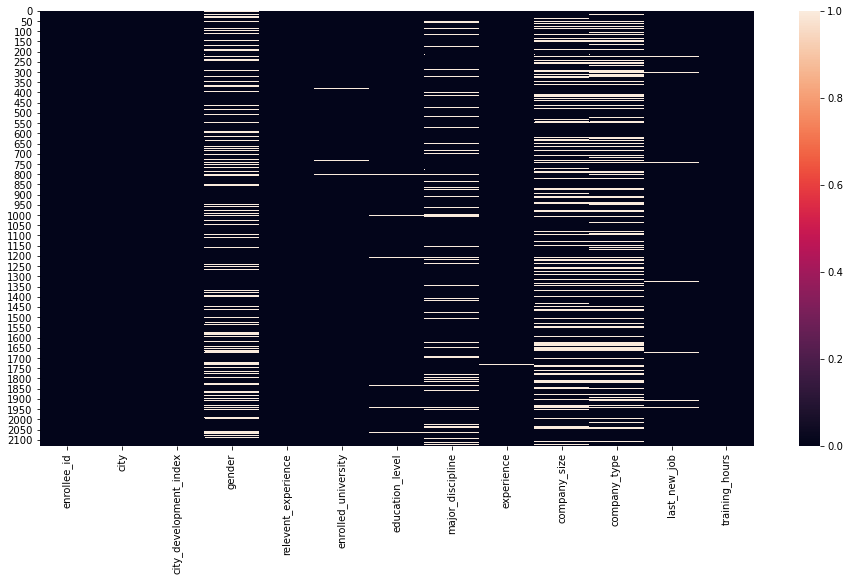

In [53]:
sns.heatmap(data_test.isnull())

In [54]:
data_test = data_test.drop(['gender','major_discipline','company_size','company_type'],axis=1)
data_test.columns

Index(['enrollee_id', 'city', 'city_development_index', 'relevent_experience',
       'enrolled_university', 'education_level', 'experience', 'last_new_job',
       'training_hours'],
      dtype='object')

In [55]:
data_test=data_test.dropna(axis=0)
data_test

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours
0,32403,city_41,0.827,Has relevent experience,Full time course,Graduate,9,1,21
1,9858,city_103,0.920,Has relevent experience,no_enrollment,Graduate,5,1,98
2,31806,city_21,0.624,No relevent experience,no_enrollment,High School,<1,never,15
3,27385,city_13,0.827,Has relevent experience,no_enrollment,Masters,11,1,39
4,27724,city_103,0.920,Has relevent experience,no_enrollment,Graduate,>20,>4,72
...,...,...,...,...,...,...,...,...,...
2124,1289,city_103,0.920,No relevent experience,no_enrollment,Graduate,16,4,15
2125,195,city_136,0.897,Has relevent experience,no_enrollment,Masters,18,2,30
2126,31762,city_100,0.887,No relevent experience,no_enrollment,Primary School,3,never,18
2127,7873,city_102,0.804,Has relevent experience,Full time course,High School,7,1,84


<AxesSubplot:>

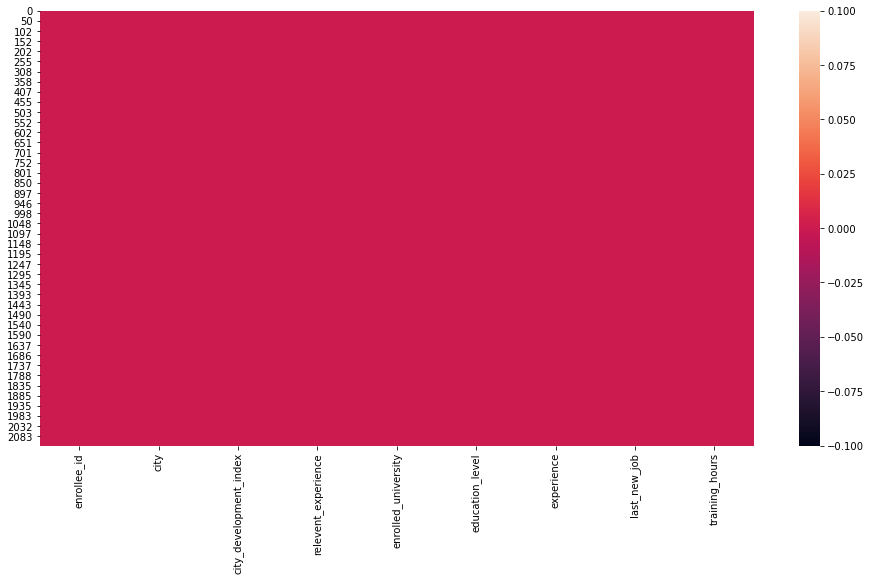

In [56]:
sns.heatmap(data_test.isnull())

In [57]:
from sklearn import preprocessing, utils

encoder = preprocessing.LabelEncoder()

for i in data_test.columns:
    if isinstance(data_test[i][0], str):
            data_test[i] = encoder.fit_transform(data_test[i])
            
data_test

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours
0,32403,68,0.827,0,0,0,19,0,21
1,9858,5,0.920,0,2,0,15,0,98
2,31806,54,0.624,1,2,1,20,5,15
3,27385,22,0.827,0,2,2,2,0,39
4,27724,5,0.920,0,2,0,21,4,72
...,...,...,...,...,...,...,...,...,...
2124,1289,5,0.920,1,2,0,7,3,15
2125,195,25,0.897,0,2,2,9,1,30
2126,31762,2,0.887,1,2,4,13,5,18
2127,7873,4,0.804,0,0,1,17,0,84


In [58]:
X=data_test.drop('enrollee_id',axis=1)

In [59]:
with open ('log_pickle','rb') as f:
    lp_test=pickle.load(f)

In [60]:
pred=lp_test.predict(X)
pred=pd.DataFrame(lp_test.predict(X),columns={'target'})
pred

,target
0,0.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
2013,1.0
2014,0.0
2015,0.0
2016,0.0


In [61]:
pred[pred == 0].count()

target    1308
dtype: int64

In [62]:
pred[pred == 1].count()

target    710
dtype: int64

In [63]:
with open ('dt_pickle','rb') as f:
    dt_test=pickle.load(f)

In [64]:
pred_dt=dt_test.predict(X)
pred_dt=pd.DataFrame(dt_test.predict(X),columns={'target'})
pred_dt

,target
0,1.0
1,0.0
2,1.0
3,0.0
4,1.0
...,...
2013,1.0
2014,0.0
2015,0.0
2016,1.0


In [65]:
pred_dt[pred_dt == 0].count()

target    1083
dtype: int64

In [66]:
pred_dt[pred_dt == 1].count()

target    935
dtype: int64

In [67]:
with open ('gnb_pickle','rb') as f:
    gnb_test=pickle.load(f)

In [68]:
pred_gnb=gnb_test.predict(X)
pred_gnb=pd.DataFrame(gnb_test.predict(X),columns={'target'})
pred_gnb

,target
0,1.0
1,0.0
2,1.0
3,0.0
4,0.0
...,...
2013,0.0
2014,0.0
2015,0.0
2016,1.0


In [69]:
pred_gnb[pred_gnb == 0].count()

target    1298
dtype: int64

In [70]:
pred_gnb[pred_gnb == 1].count()

target    720
dtype: int64

We used the saved models of Logistic Regression, Decision Tree & Naive Bayes to predict the targets for testing DataFrame.

## Now, we will insert target values of one of the models into the original DataFrame and save it.

In [71]:
new_df=pd.merge(data_test, pred, left_index=True, right_index=True)

new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1914 entries, 0 to 2017
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             1914 non-null   int64  
 1   city                    1914 non-null   int32  
 2   city_development_index  1914 non-null   float64
 3   relevent_experience     1914 non-null   int32  
 4   enrolled_university     1914 non-null   int32  
 5   education_level         1914 non-null   int32  
 6   experience              1914 non-null   int32  
 7   last_new_job            1914 non-null   int32  
 8   training_hours          1914 non-null   int64  
 9   target                  1914 non-null   float64
dtypes: float64(2), int32(6), int64(2)
memory usage: 119.6 KB


In [72]:
new_df

,enrollee_id,city,city_development_index,relevent_experience,enrolled_university,education_level,experience,last_new_job,training_hours,target
0,32403,68,0.827,0,0,0,19,0,21,0.0
1,9858,5,0.920,0,2,0,15,0,98,0.0
2,31806,54,0.624,1,2,1,20,5,15,1.0
3,27385,22,0.827,0,2,2,2,0,39,0.0
4,27724,5,0.920,0,2,0,21,4,72,0.0
...,...,...,...,...,...,...,...,...,...,...
2013,17426,3,0.558,0,2,0,15,1,80,1.0
2014,9806,81,0.802,0,2,2,6,4,27,0.0
2015,25886,11,0.926,1,2,1,19,0,170,0.0
2016,2736,41,0.910,0,2,0,19,0,41,0.0


In [73]:
new_df.to_csv('aug_test_pred.csv')

In [74]:
new_df.target.value_counts()

0.0    1237
1.0     677
Name: target, dtype: int64

<AxesSubplot:xlabel='target', ylabel='count'>

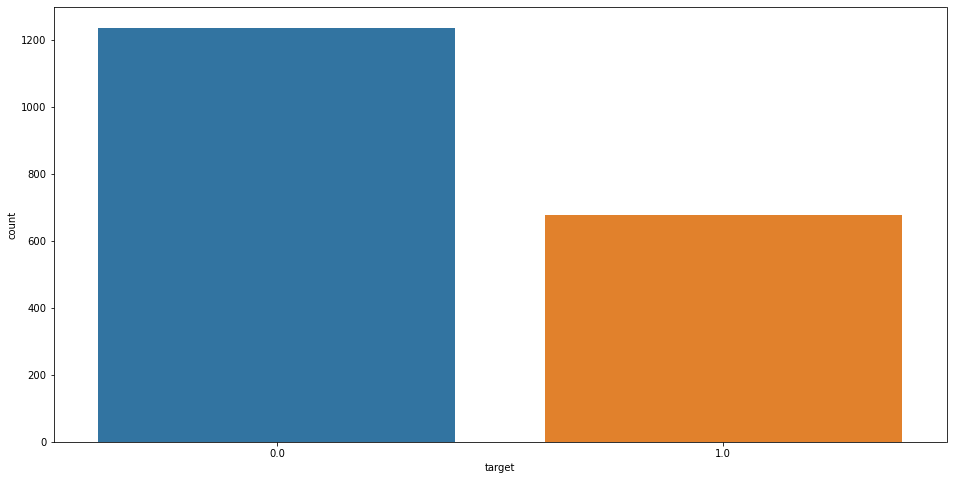

In [75]:
sns.countplot(new_df['target'])

<AxesSubplot:xlabel='education_level', ylabel='enrolled_university'>

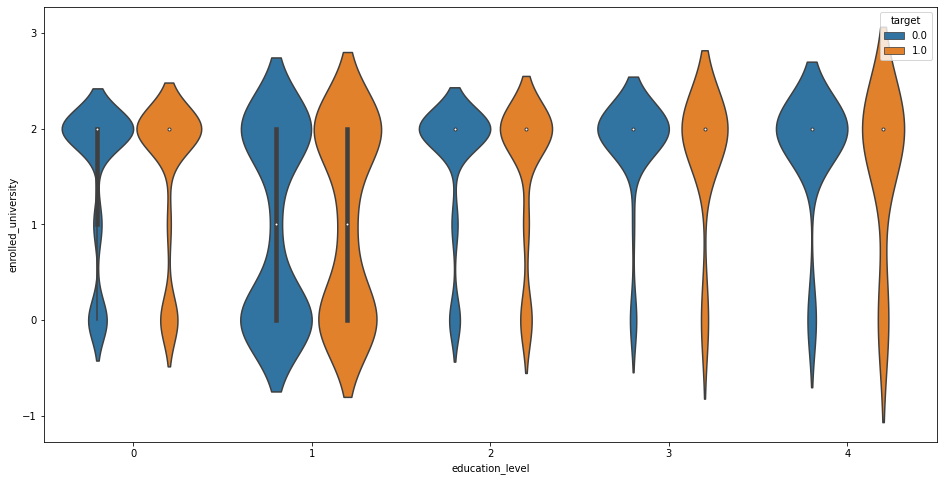

In [76]:
sns.violinplot(x='education_level',y='enrolled_university',hue='target',data=new_df)

<AxesSubplot:xlabel='education_level', ylabel='relevent_experience'>

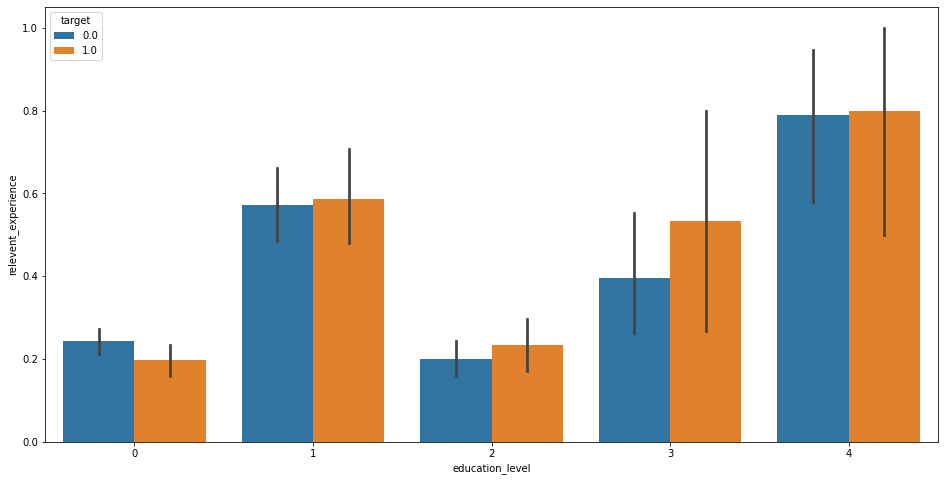

In [77]:
sns.barplot(x='education_level',y='relevent_experience',hue='target',data=new_df)

<AxesSubplot:xlabel='city_development_index', ylabel='city'>

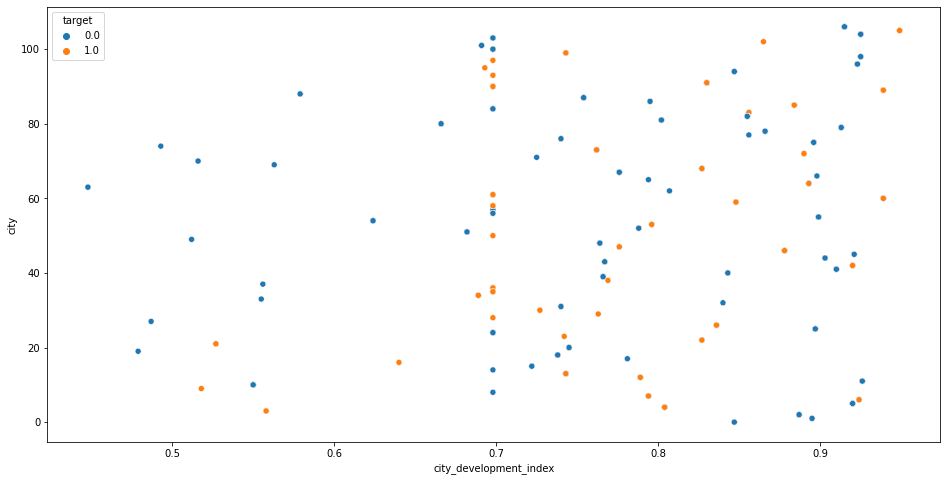

In [78]:
sns.scatterplot(x='city_development_index',y='city',data=new_df,hue='target')